In [1]:
# Simple analisys for understanding 

In [2]:
# import all lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import pandas datareader for resd data diredtly 
import pandas_datareader as data

# import yfinance for stock data 
import yfinance as yf

In [3]:
# Define the date range
start = '2011-01-01'
end = '2023-12-31'

# Fetch the data
df = yf.download('TSLA', start=start, end=end)
print(df.head())

[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2011-01-03  1.789333  1.800000  1.726667  1.774667   1.774667  19245000
2011-01-04  1.777333  1.796667  1.734667  1.778000   1.778000  17811000
2011-01-05  1.765333  1.793333  1.746000  1.788667   1.788667  21700500
2011-01-06  1.788667  1.866667  1.787333  1.858667   1.858667  30918000
2011-01-07  1.866667  1.905333  1.860000  1.882667   1.882667  33718500


In [4]:
# Print the last few rows before dropping columns
print("Data before dropping columns:")
print(df.tail())

# Drop 'Adj Close' column
df = df.drop(['Adj Close'], axis=1)

# Print the last few rows after dropping column
print("Data after dropping 'Adj Close' column:")
print(df.tail())

Data before dropping columns:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-22  256.760010  258.220001  251.369995  252.539993  252.539993   
2023-12-26  254.490005  257.970001  252.910004  256.609985  256.609985   
2023-12-27  258.350006  263.339996  257.519989  261.440002  261.440002   
2023-12-28  263.660004  265.130005  252.710007  253.179993  253.179993   
2023-12-29  255.100006  255.190002  247.429993  248.479996  248.479996   

               Volume  
Date                   
2023-12-22   93249800  
2023-12-26   86892400  
2023-12-27  106494400  
2023-12-28  113619900  
2023-12-29  100615300  
Data after dropping 'Adj Close' column:
                  Open        High         Low       Close     Volume
Date                                                                 
2023-12-22  256.760010  258.220001  251.369995  252.539993   93249800
2023-12-26  254.490005  257.97000

Graph of close price


,Open,High,Low,Close,Volume
Date,,,,,
2011-01-03,1.789333,1.800000,1.726667,1.774667,19245000
2011-01-04,1.777333,1.796667,1.734667,1.778000,17811000
2011-01-05,1.765333,1.793333,1.746000,1.788667,21700500
2011-01-06,1.788667,1.866667,1.787333,1.858667,30918000
2011-01-07,1.866667,1.905333,1.860000,1.882667,33718500
...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,106494400


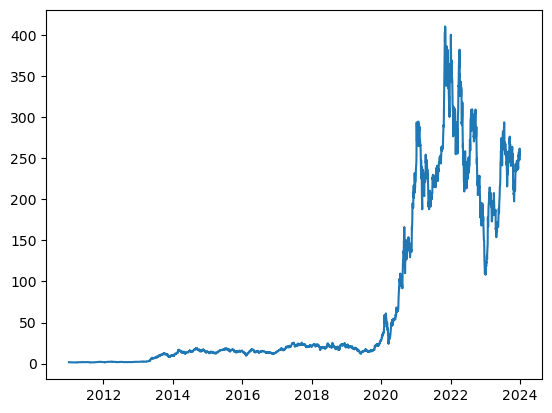

In [5]:
# using plotlib to creat simpel graph of Close 
print("Graph of close price")
plt.plot(df.Close)
df

In [6]:
# Finding the moving avreg with 100 days 
ma100 = df.Close.rolling(100).mean()
ma100

Date
2011-01-03           NaN
2011-01-04           NaN
2011-01-05           NaN
2011-01-06           NaN
2011-01-07           NaN
                 ...    
2023-12-22    241.505100
2023-12-26    241.477999
2023-12-27    241.553799
2023-12-28    241.571099
2023-12-29    241.558899
Name: Close, Length: 3270, dtype: float64

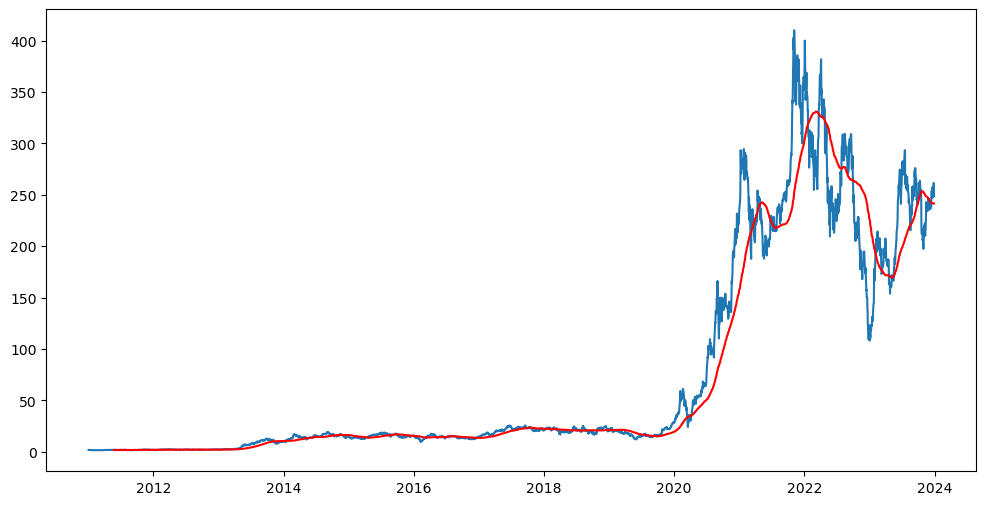

In [7]:
# creat graph of the moving and close priceavregis 
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [8]:
# Finding the moving avreg with 200 days 
ma200 = df.Close.rolling(200).mean()
ma200


Date
2011-01-03          NaN
2011-01-04          NaN
2011-01-05          NaN
2011-01-06          NaN
2011-01-07          NaN
                ...    
2023-12-22    227.70775
2023-12-26    228.12360
2023-12-27    228.55840
2023-12-28    228.90800
2023-12-29    229.24815
Name: Close, Length: 3270, dtype: float64

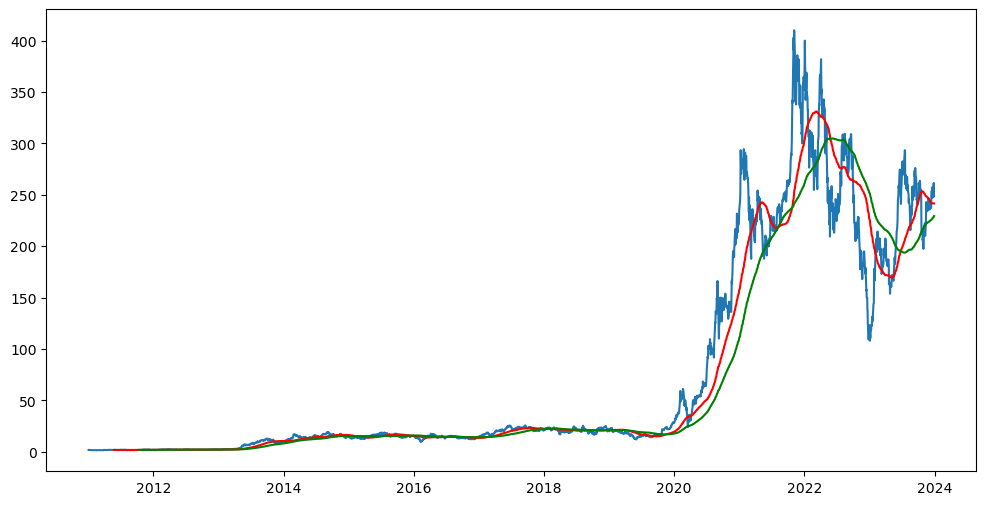

In [9]:
# creat graph of the moving avregis with 100 days and 200 days 
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [41]:
#clean data
df.dropna(inplace=True)

In [11]:
# Spliting data into Training and testing (70% data is for traing and 30% data for testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)
df.shape

(2289, 1)
(981, 1)


(3270, 5)

In [12]:
# lets see our traing data head and tail

print("Trainimg data head")
data_training.head()

Trainimg data head


,Close
Date,
2011-01-03,1.774667
2011-01-04,1.778000
2011-01-05,1.788667
2011-01-06,1.858667
2011-01-07,1.882667


In [13]:
print("Traing data end")
data_training.tail()

Traing data end


,Close
Date,
2020-01-31,43.371334
2020-02-03,52.000000
2020-02-04,59.137333
2020-02-05,48.980000
2020-02-06,49.930668


In [14]:
# lets see our testing data head and tail

print("Testing data head")
data_testing.head()

Testing data head


,Close
Date,
2020-02-07,49.871334
2020-02-10,51.418667
2020-02-11,51.625332
2020-02-12,51.152668
2020-02-13,53.599998


In [15]:
print("Testing data end")
data_testing.tail()

Testing data end


,Close
Date,
2023-12-22,252.539993
2023-12-26,256.609985
2023-12-27,261.440002
2023-12-28,253.179993
2023-12-29,248.479996


In [16]:
# Scaling down the data between 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [17]:
# creat array for traing data 

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00553611],
       [0.00559389],
       [0.00577882],
       ...,
       [1.        ],
       [0.82390809],
       [0.84038929]])

In [18]:
# Variables Initialization
x_train = []
y_train = [] 

#Data Preparation Loop
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

#Convert to NumPy Arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
# ML model 

In [20]:
# Install TensorFlow (in case it isn't installed)
!pip install tensorflow

# Use tensorflow.keras for imports
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [21]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)


TensorFlow version: 2.17.0
Keras version: 3.6.0


In [22]:
# Initialize the model
model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer with Dropout
model.add(LSTM(60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer with Dropout
model.add(LSTM(80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Fourth LSTM layer with Dropout
model.add(LSTM(120, activation='relu', return_sequences=False))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1))

# Summary of the model
model.summary()


C:\Users\Ayush\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile the model with the corrected loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - loss: 0.0231
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - loss: 0.0028
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 0.0023
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0023
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 0.0021
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 0.0021
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.0022
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0016
Epoch 9/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - loss: 0.0018
Epoch 10/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0021
Epoch 11/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - loss: 0.0017
Epoch 12/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - loss: 0.0017
Epoch 13/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0015
Epoch 14/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.0014
Epoch 15/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - l

In [24]:
# Save model using the recommended native Keras format
model.save('stock_train_model.keras')

In [25]:
data_testing.head()

,Close
Date,
2020-02-07,49.871334
2020-02-10,51.418667
2020-02-11,51.625332
2020-02-12,51.152668
2020-02-13,53.599998


In [26]:
data_testing.tail()

,Close
Date,
2023-12-22,252.539993
2023-12-26,256.609985
2023-12-27,261.440002
2023-12-28,253.179993
2023-12-29,248.479996


In [27]:
past_100_days = data_training.tail(100)

In [28]:
# Use pd.concat instead of .append (since .append is deprecated)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [29]:
final_df.head()

,Close
0,16.187332
1,16.319332
2,16.232668
3,16.440001
4,16.041332


In [30]:
# Scaling the data
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00330727],
       [0.00364137],
       [0.00342201],
       ...,
       [0.62405971],
       [0.60315302],
       [0.59125699]])

In [31]:
input_data.shape

(1081, 1)

In [32]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [33]:
# Convert to NumPy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

# Check the shapes of x_test and y_test
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_test shape: (981, 100, 1)
y_test shape: (981,)


In [34]:
# Making Predictions
y_predicted = model.predict(x_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step


In [35]:
model.save('LSTM model.keras')

In [36]:
# Print the shape of the predicted values
print("y_predicted shape:", y_predicted.shape)

y_predicted shape: (981, 1)


In [37]:
scaler.scale_

array([0.00253107])

In [38]:
scale_factor = 1/0.00253107
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

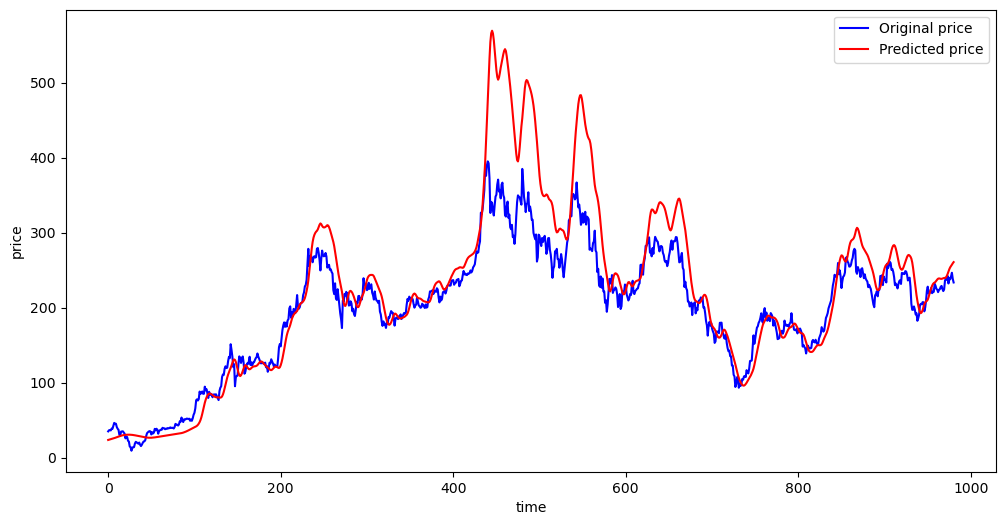

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b' , label = 'Original price')
plt.plot(y_predicted, 'r', label = 'Predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()